<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you p

In [4]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

from imblearn.over_sampling import SMOTE

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-1.csv')


In [7]:
Data = data_original.copy()


## Data Overview

In [8]:
Data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
Data.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
Data.shape


(10000, 14)

- The dataset has 10000 rows and 14 columns

In [11]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are 10,000 observations and 14 columns in the data.
- 3 columns are of the object datatype and 11 columns are numerical.

In [12]:
Data.duplicated().sum()


np.int64(0)

In [13]:
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)


,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


- No missing values

In [14]:
Data["Exited"].value_counts(1)


,proportion
Exited,
0,0.7963
1,0.2037


- Unbalanced on our target variable

In [15]:
Data.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- CreditScore  min 350 and max 850
- Age min 18 and max 92
- Tenure min 0 and max 10
- Balance min 0 and max of 250,898

In [16]:
Data.nunique()


,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


* Each value of the column 'RowNumber' and 'CustomerId' is a unique identifier for the customers. Hence we can drop this column as it will not add any predictive power or value to the model.
* The 'Geography' and 'NumOfProducts' column has 3 and 4 unique categories respectively.

In [17]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


- Most of the customers in the dataset are from France
- Number of gender in the dataset for male and female is balanced

## Exploratory Data Analysis

In [18]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

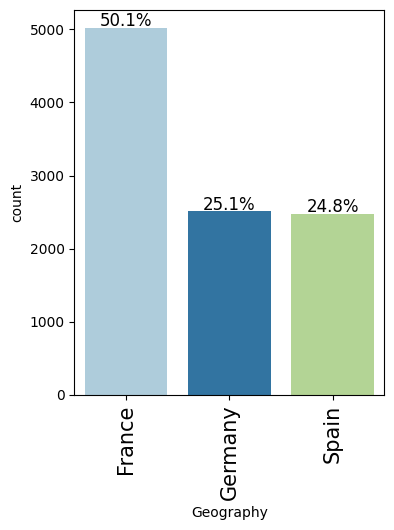

In [22]:
labeled_barplot(Data, 'Geography', perc = True)


- Most of 50% the customers are from the France and the rest twenty twenty five percent are from Germany and Spain

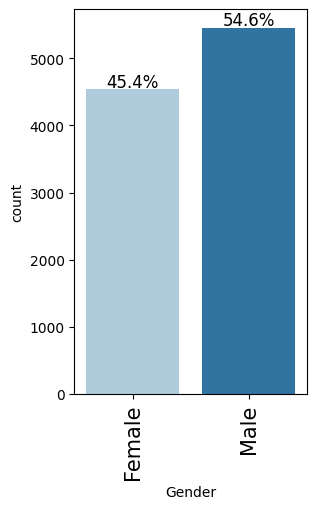

In [23]:
labeled_barplot(Data, 'Gender', perc = True)


- There is around equal proportion of gender

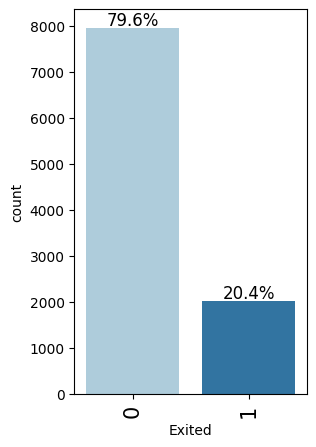

In [24]:
labeled_barplot(Data, 'Exited', perc = True)


* This bar chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20.4% of the customers are leaving.

Hence, this dataset and problem statement represent an example of Imbalanced Classification.

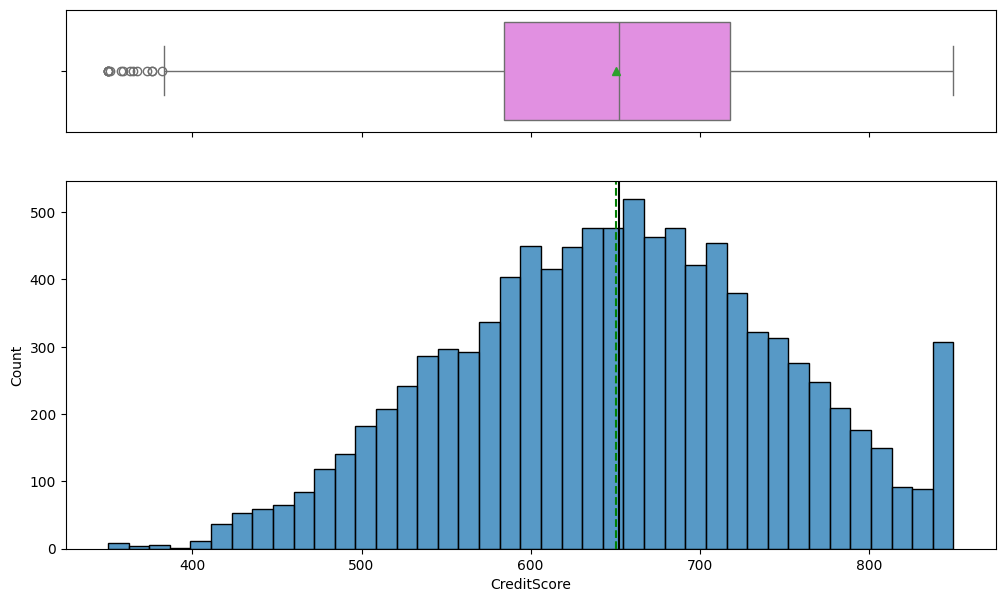

In [25]:
histogram_boxplot(Data, "CreditScore")


- Average of the creditscore is around 650

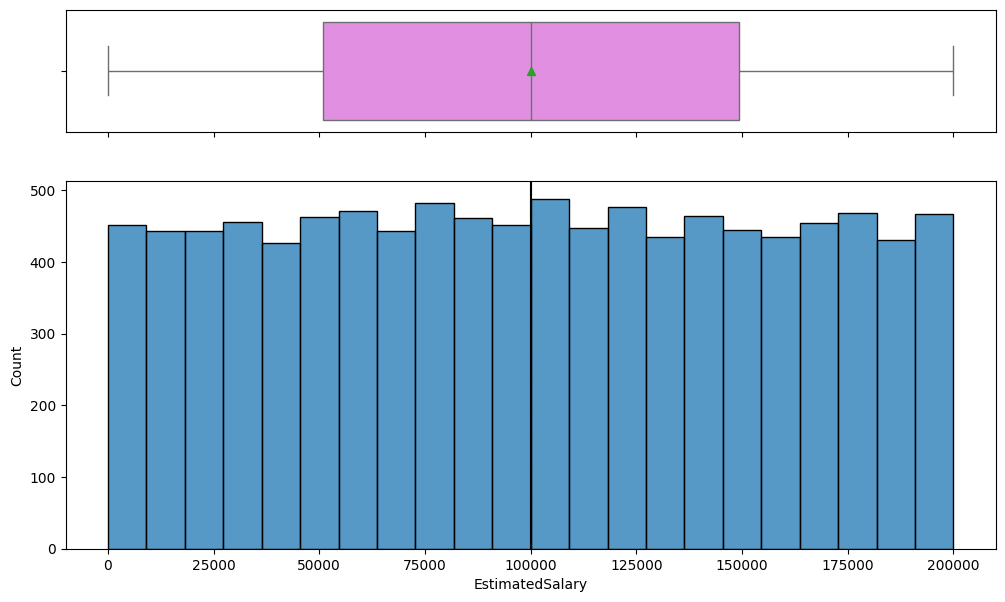

In [26]:
histogram_boxplot(Data, "EstimatedSalary")


- Estimated salary is uniformly distributed and its average is 100000

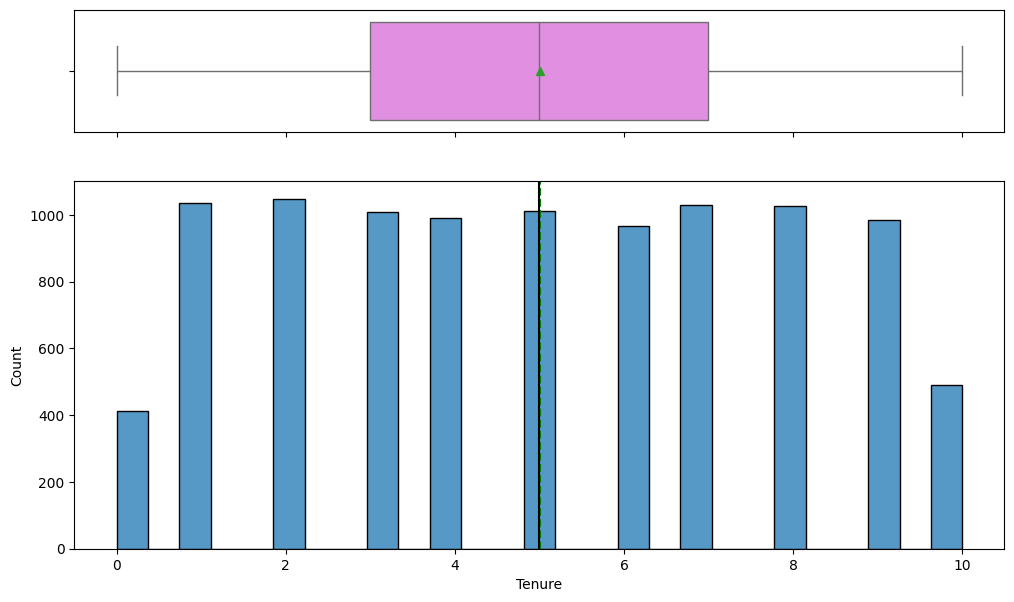

In [27]:
histogram_boxplot(Data, "Tenure")


- Average of Tenure is around 5 years

### Bivariate Analysis

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


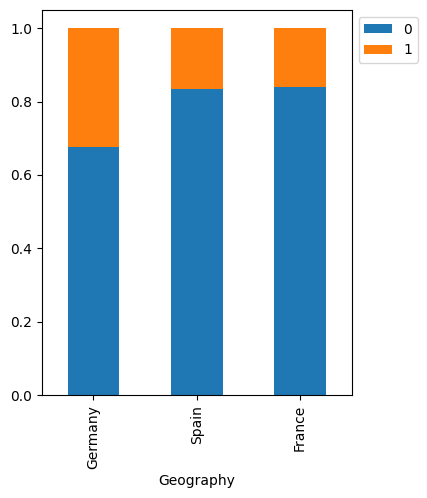

In [28]:
stacked_barplot(Data, 'Geography', 'Exited')


- Most of customers are leaving from Germany

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


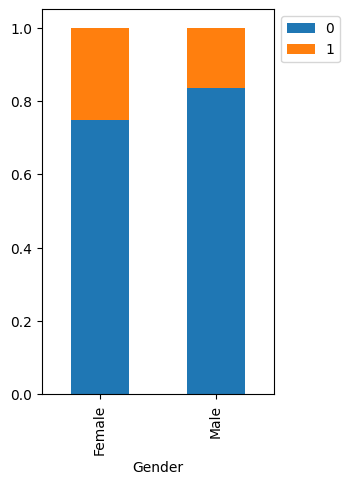

In [29]:
stacked_barplot(Data, 'Gender', 'Exited')


- There is no much difference on leaving the bank with respect to gender but female's are more likly to leave than male's

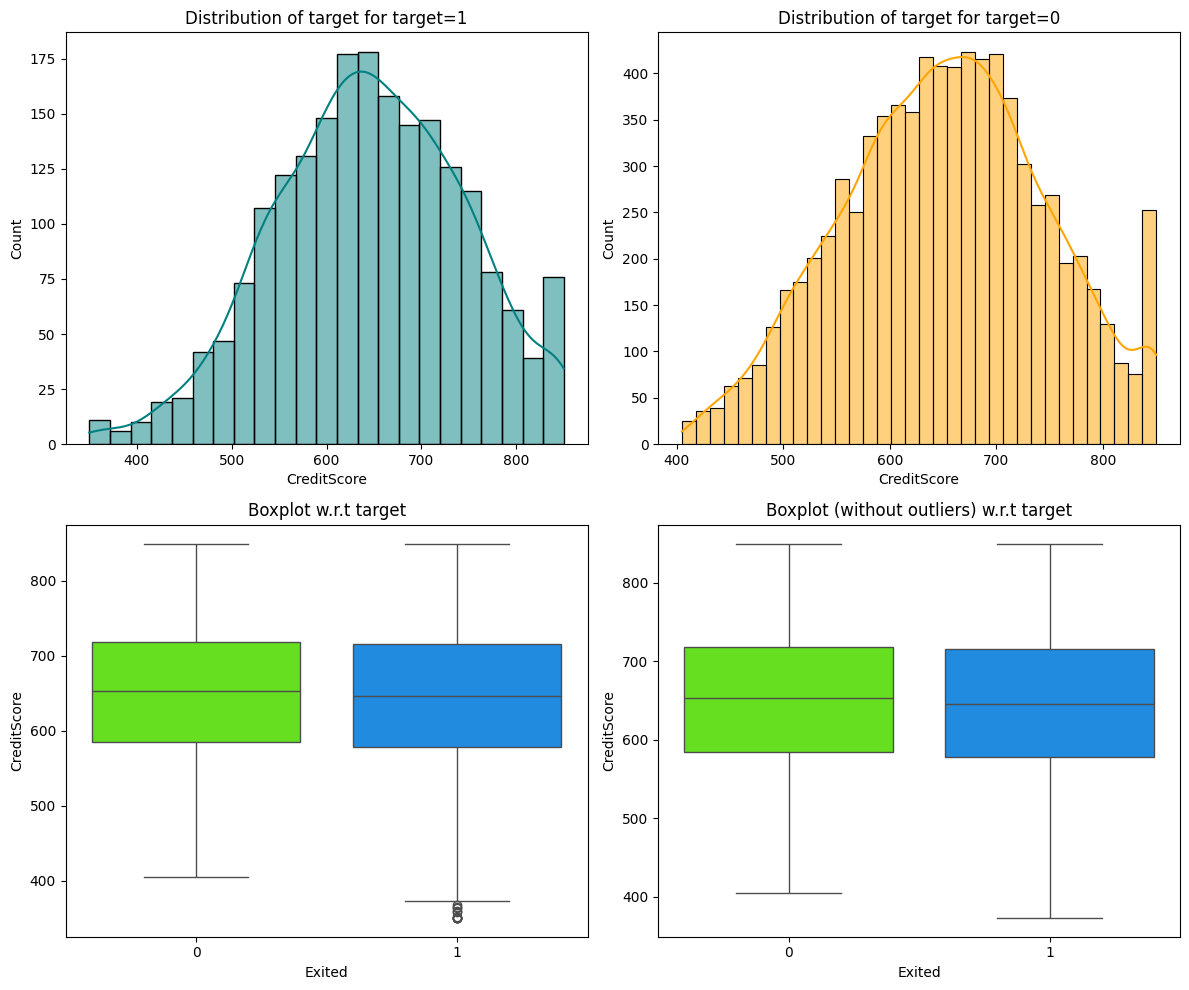

In [30]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")


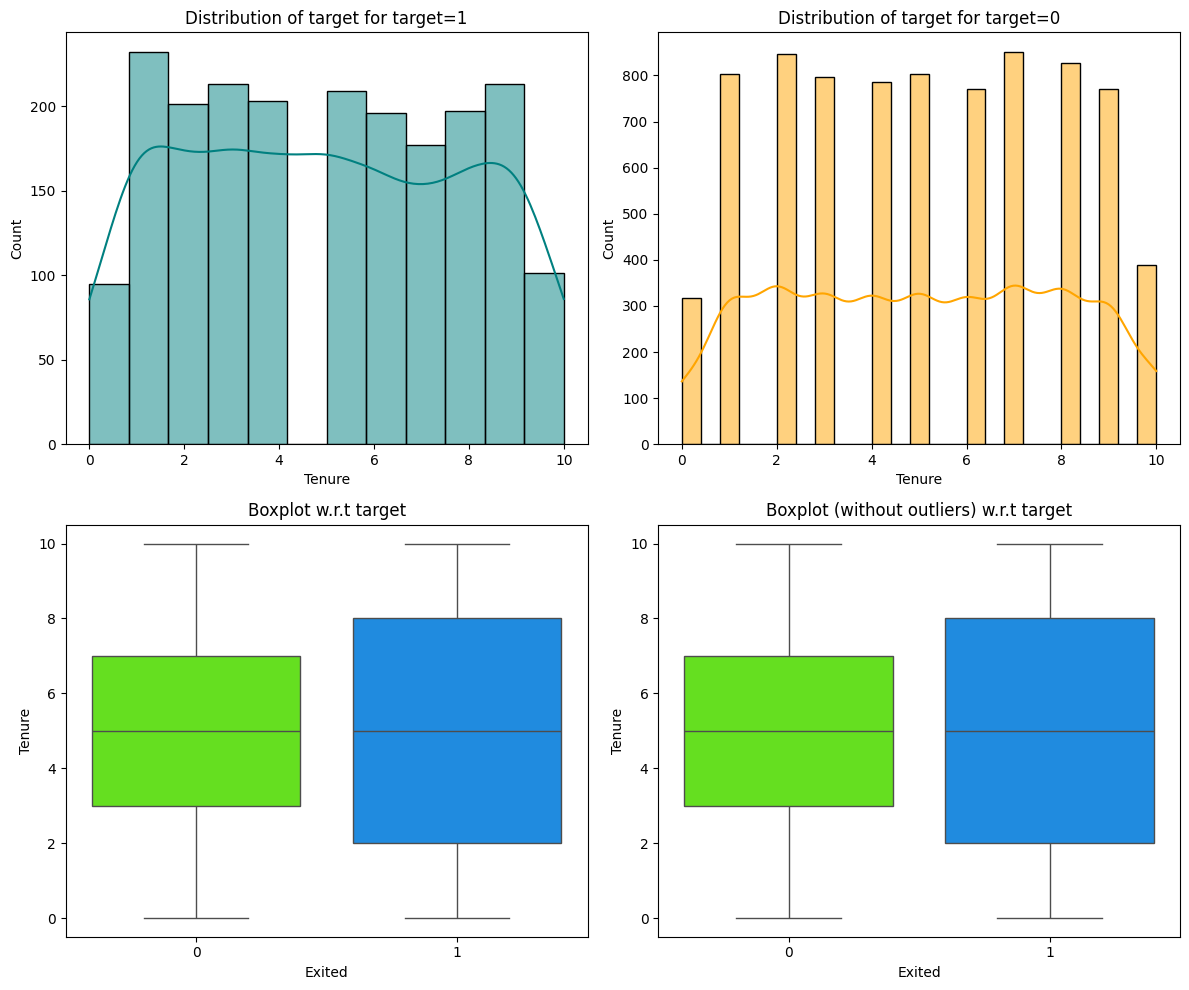

In [31]:
distribution_plot_wrt_target(Data, "Tenure", "Exited")


## Data Preprocessing

In [32]:
# RowNumber, CustomerId and Surname  column consists of uniques for clients and hence will not add value to the modeling
Data.drop(columns= ['CustomerId', 'Surname', 'RowNumber'], axis = 1, inplace=True)

In [33]:
## Separating Independent and Dependent Columns
X = Data.drop(['Exited'],axis=1)
Y = Data['Exited']

In [34]:
X.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [35]:
print(X.dtypes)


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


### Dummy Variable Creation

In [36]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=[ 'Geography', 'Gender'],
    drop_first=True,
)

X = X.astype(float)

In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
print(X.dtypes)

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Male          float64
dtype: object


### Data Normalization

In [39]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = transformer.fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])

### Train-validation-test Split

In [40]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)


In [42]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [43]:
#Change pd frames to numpy for further deep learning model building
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

## Model Building

In [44]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [46]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.2558869701726845), 1: np.float64(4.9079754601226995)}

In [47]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.


**A model can make wrong predictions in the following ways:**
* Predicting a customer is leaving, when he/she is not looking for it.
* Predicting a customer is not leaving, when he/she is in fact looking for one.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the bank would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.




### Neural Network with SGD Optimizer

- Start with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [48]:
tf.keras.backend.clear_session()


In [49]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [50]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [52]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5686 - val_loss: 0.6758
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3196 - val_loss: 0.6712
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2746 - val_loss: 0.6428
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2689 - val_loss: 0.6151
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2239 - val_loss: 0.5962
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1934 - val_loss: 0.5973
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1705 - val_loss: 0.5851
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1802 - val_loss: 0.5700
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1577 - val_loss: 0.5580
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1665 - val_loss: 0.5522
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1246 - val_loss: 0.5511
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [53]:
print("Time taken in seconds ",end-start)


Time taken in seconds  13.107166528701782


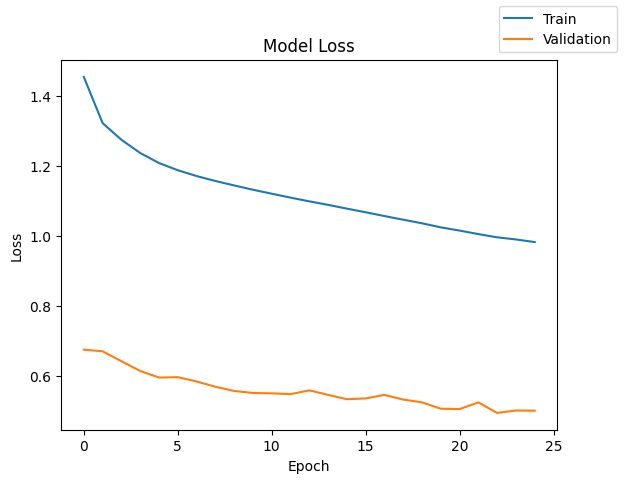

In [54]:
plot(history,'loss')


In [55]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.760469,0.760469,0.830143,0.779935


In [56]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7625,0.7625,0.826936,0.781145


- Train F1 score of ~0.779 and test F1 score of ~0.78 indicate consistent performance of the model between training and testing datasets.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [57]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [58]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [59]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [61]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4097 - val_loss: 0.7470
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2711 - val_loss: 0.7064
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2206 - val_loss: 0.6660
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1473 - val_loss: 0.5750
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1017 - val_loss: 0.5336
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0504 - val_loss: 0.5156
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0173 - val_loss: 0.5059
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9825 - val_loss: 0.5100
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9825 - val_loss: 0.4939
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9920 - val_loss: 0.4895
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9454 - val_loss: 0.4853
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [62]:
print("Time taken in seconds ",end-start)


Time taken in seconds  12.886494874954224


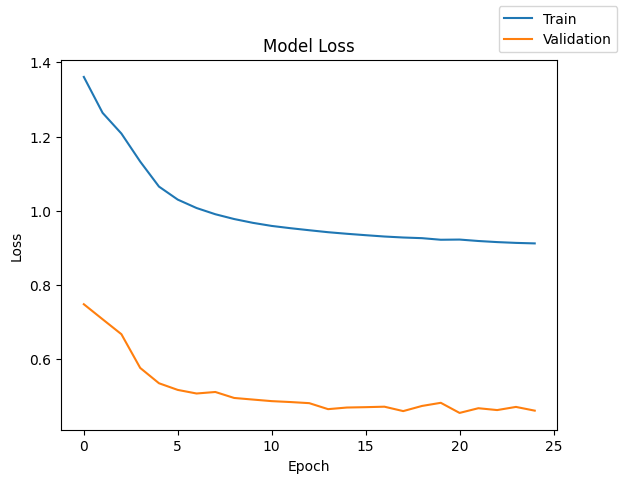

In [63]:
plot(history,'loss')


In [64]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.797813,0.797813,0.842204,0.811309


In [65]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.788125,0.788125,0.832347,0.802072


- As expected, there is a improvement in the train and test scores.
- Also the difference between the train and valid scores is consistent.

### Neural Network with Adam Optimizer and Dropout

In [66]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [67]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [70]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5769 - val_loss: 0.6445
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3735 - val_loss: 0.6129
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3666 - val_loss: 0.6131
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3361 - val_loss: 0.5986
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2793 - val_loss: 0.6043
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2322 - val_loss: 0.5971
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2143 - val_loss: 0.5882
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2239 - val_loss: 0.5792
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2362 - val_loss: 0.5740
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1971 - val_loss: 0.5720
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2276 - val_loss: 0.5655
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [71]:
print("Time taken in seconds ",end-start)


Time taken in seconds  16.100082635879517


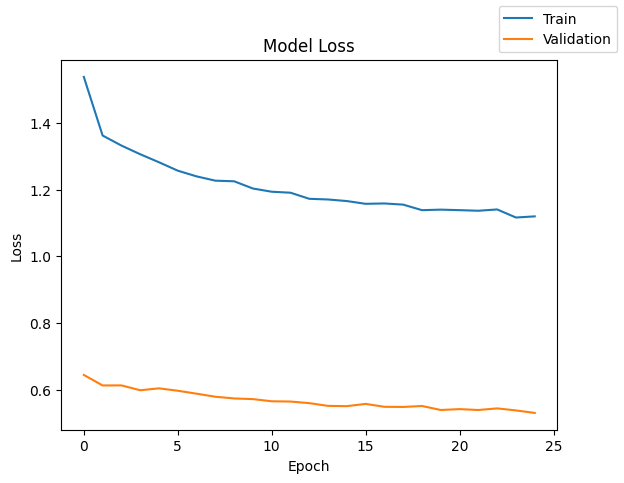

In [72]:
plot(history,'loss')


In [73]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7525,0.7525,0.821996,0.772492


In [74]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7375,0.7375,0.8119,0.759166


- The difference between train and validation scores is closed but reduced in performance.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [75]:
sm = SMOTE(sampling_strategy = 0.5, k_neighbors = 5, random_state = 1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [76]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [77]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [78]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [80]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5916 - val_loss: 0.8707
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5187 - val_loss: 0.8516
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4475 - val_loss: 0.8338
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3852 - val_loss: 0.8028
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3255 - val_loss: 0.7936
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2969 - val_loss: 0.7688
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2627 - val_loss: 0.7496
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2629 - val_loss: 0.7408
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2568 - val_loss: 0.7451
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2468 - val_loss: 0.7474
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2499 - val_loss: 0.7156
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [81]:
print("Time taken in seconds ",end-start)


Time taken in seconds  16.6014666557312


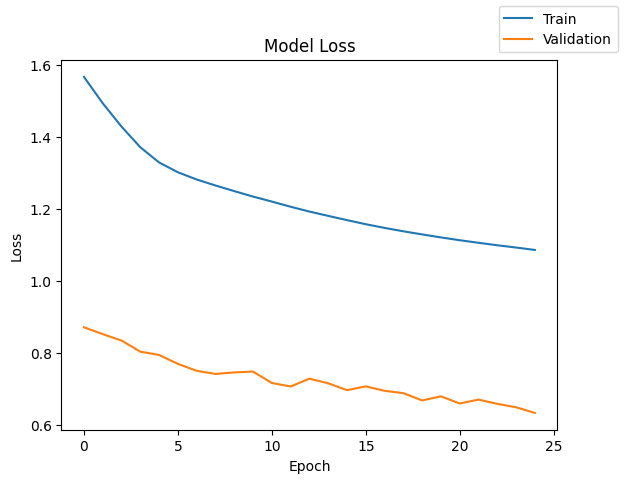

In [82]:
plot(history,'loss')


In [83]:
model_3_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_3_train_perf

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.707614,0.707614,0.789715,0.715103


In [84]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.65625,0.65625,0.829842,0.689373


- AS not expected the scores are reduced on over sampling method

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [85]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [86]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [87]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [89]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.6332 - val_loss: 0.8822
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4290 - val_loss: 0.8589
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3604 - val_loss: 0.8071
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3129 - val_loss: 0.7888
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2646 - val_loss: 0.7447
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2246 - val_loss: 0.7467
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1849 - val_loss: 0.7223
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1601 - val_loss: 0.6543
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1561 - val_loss: 0.7153
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1114 - val_loss: 0.6303
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0887 - val_loss: 0.6528
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [90]:
print("Time taken in seconds ",end-start)


Time taken in seconds  15.448768615722656


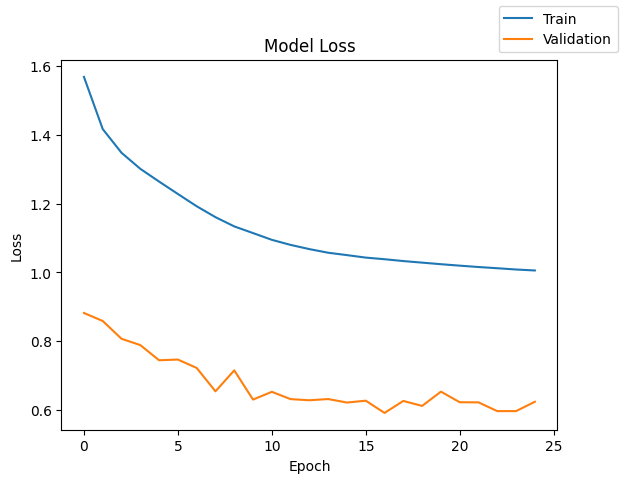

In [91]:
plot(history,'loss')


In [92]:
model_4_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_4_train_perf

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.733255,0.733255,0.808143,0.740436


In [93]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.67625,0.67625,0.830741,0.707717


- There's no improvement in the scores of the oversampling.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [94]:
tf.keras.backend.clear_session()


In [95]:
model = Sequential()
model.add(Dense(14, activation = 'relu', input_dim = X_train_over.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation  = 'sigmoid'))

In [96]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [98]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.7372 - val_loss: 0.8581
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5847 - val_loss: 0.8303
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4983 - val_loss: 0.7941
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4529 - val_loss: 0.7882
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4095 - val_loss: 0.7621
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3816 - val_loss: 0.7375
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3318 - val_loss: 0.7395
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3024 - val_loss: 0.7366
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3103 - val_loss: 0.6949
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2720 - val_loss: 0.7004
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2595 - val_loss: 0.6893
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

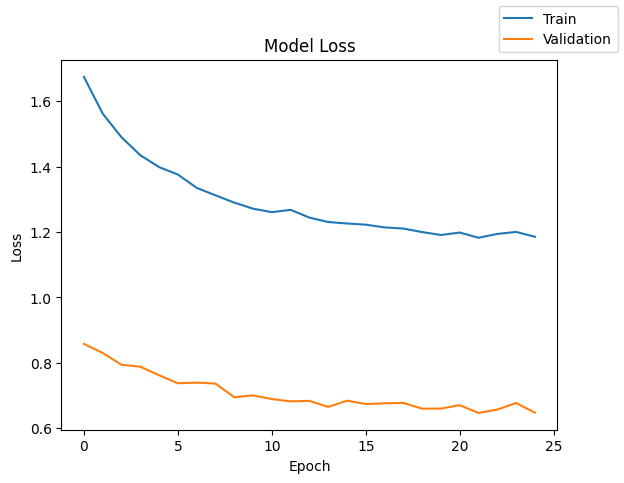

In [99]:
plot(history,'loss')

In [100]:
model_5_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_5_train_perf


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.696494,0.696494,0.790654,0.703474


In [101]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.65125,0.65125,0.83563,0.684516


- Reduced in performance

##  Neural Network (Adam, four layers, dropout)

In [102]:
tf.keras.backend.clear_session()


In [103]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [104]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [106]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.3838 - val_loss: 0.6569
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2539 - val_loss: 0.5411
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1706 - val_loss: 0.5588
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1391 - val_loss: 0.5425
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1241 - val_loss: 0.5145
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0774 - val_loss: 0.5099
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0467 - val_loss: 0.4972
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0589 - val_loss: 0.4914
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0242 - val_loss: 0.4681
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0506 - val_loss: 0.4864
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0443 - val_loss: 0.4748
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [107]:
print("Time taken in seconds ",end-start)


Time taken in seconds  16.75551128387451


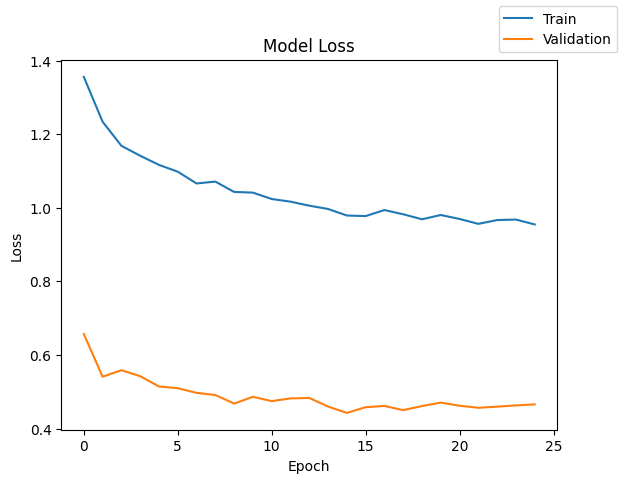

In [108]:
plot(history,'loss')


In [109]:
model_6_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_6_train_perf

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780351,0.780351,0.807952,0.785866


In [110]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7575,0.7575,0.831384,0.777678


- There is no improvement on performance score

##  Neural Network (Adam, four layers, dropout, BatchNormalization)

In [111]:
tf.keras.backend.clear_session()


In [112]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [113]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,641 (10.32 KB)

 Trainable params: 2,449 (9.57 KB)

 Non-trainable params: 192 (768.00 B)

In [114]:
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [115]:
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()


Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 2.0609 - val_loss: 0.7193
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5012 - val_loss: 0.7587
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4546 - val_loss: 0.7409
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3771 - val_loss: 0.7246
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3081 - val_loss: 0.7119
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2541 - val_loss: 0.6876
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2264 - val_loss: 0.6650
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2015 - val_loss: 0.6628
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1649 - val_loss: 0.6587
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1728 - val_loss: 0.6461
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1485 - val_loss: 0.6416
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [116]:
print("Time taken in seconds ",end-start)

Time taken in seconds  24.598468780517578


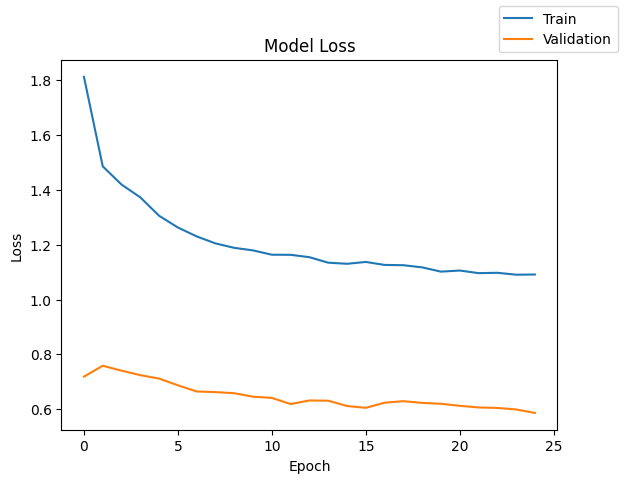

In [117]:
plot(history,'loss')

In [118]:
model_7_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_7_train_perf


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.755625,0.755625,0.811842,0.762604


In [119]:
model_7_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_7_valid_perf


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.71875,0.71875,0.837176,0.745512


- It's not better performance score while compared to the priors

## Model Performance Comparison and Final Model Selection

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T


    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Balanced Data (by applying SMOTE) and SGD Optimizer)",
    "Neural Network (Balanced Data (by applying SMOTE) and Adam Optimizer)",
    "Neural Network (Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout)",
    "Neural Network (Adam, four layers, dropout)",
    "Neural Network (Adam, four layers, dropout, BatchNormalization)"
]

In [121]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Balanced Data (by applying SMOTE) and SGD Optimizer)",
    "Neural Network (Balanced Data (by applying SMOTE) and Adam Optimizer)",
    "Neural Network (Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout)",
    "Neural Network (Adam, four layers, dropout)",
    "Neural Network (Adam, four layers, dropout, BatchNormalization)"
]

In [122]:
models_train_comp_df


,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])",Neural Network (Balanced Data (by applying SMOTE) and SGD Optimizer),Neural Network (Balanced Data (by applying SMOTE) and Adam Optimizer),"Neural Network (Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout)","Neural Network (Adam, four layers, dropout)","Neural Network (Adam, four layers, dropout, BatchNormalization)"
Accuracy,0.760469,0.797813,0.752500,0.707614,0.733255,0.696494,0.780351,0.755625
Recall,0.760469,0.797813,0.752500,0.707614,0.733255,0.696494,0.780351,0.755625
Precision,0.830143,0.842204,0.821996,0.789715,0.808143,0.790654,0.807952,0.811842
F1 Score,0.779935,0.811309,0.772492,0.715103,0.740436,0.703474,0.785866,0.762604


In [123]:
models_valid_comp_df


,"Neural Network (SGD, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])",Neural Network (Balanced Data (by applying SMOTE) and SGD Optimizer),Neural Network (Balanced Data (by applying SMOTE) and Adam Optimizer),"Neural Network (Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout)","Neural Network (Adam, four layers, dropout)","Neural Network (Adam, four layers, dropout, BatchNormalization)"
Accuracy,0.762500,0.788125,0.737500,0.656250,0.676250,0.651250,0.757500,0.718750
Recall,0.762500,0.788125,0.737500,0.656250,0.676250,0.651250,0.757500,0.718750
Precision,0.826936,0.832347,0.811900,0.829842,0.830741,0.835630,0.831384,0.837176
F1 Score,0.781145,0.802072,0.759166,0.689373,0.707717,0.684516,0.777678,0.745512


In [124]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]


,F1 Score
"Neural Network (SGD, No Regularization)",-0.001210
"Neural Network (Adam , No Regularization)",0.009237
"Neural Network (Adam, dropout [0.4,0.2])",0.013326
Neural Network (Balanced Data (by applying SMOTE) and SGD Optimizer),0.025730
Neural Network (Balanced Data (by applying SMOTE) and Adam Optimizer),0.032719
"Neural Network (Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout)",0.018959
"Neural Network (Adam, four layers, dropout)",0.008188
"Neural Network (Adam, four layers, dropout, BatchNormalization)",0.017092


- Final Model: **Neural Network (Adam, No Regularization)**
- Reasoning:
  - Best F1 score on the training set (~0.81), indicating strong performance in learning from the training data.
  - Best F1 score on the validation set (~0.80), demonstrating good performance in generalizing to unseen data.
  - When considering scores, Model 1  and Model 6 outperforms others, But because of interpretability, explain, easier to understand, debug, maintain, and deploy with respect to time and inference speed, I will go with less complex simple model of 2

In [125]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()


In [126]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [127]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [129]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2837 - val_loss: 0.5665
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1334 - val_loss: 0.5636
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1101 - val_loss: 0.5493
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0675 - val_loss: 0.5527
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0625 - val_loss: 0.5355
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0194 - val_loss: 0.5140
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0093 - val_loss: 0.5293
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9956 - val_loss: 0.5014
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9881 - val_loss: 0.5039
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9370 - val_loss: 0.5012
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9602 - val_loss: 0.4743
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [130]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.723385095596313


In [131]:

model_ch_train_perf = model_performance_classification(model, X_train, y_train)
model_ch_train_perf


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.803594,0.803594,0.844782,0.816244


In [132]:
model_ch_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_ch_valid_perf


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.785625,0.785625,0.831935,0.800075


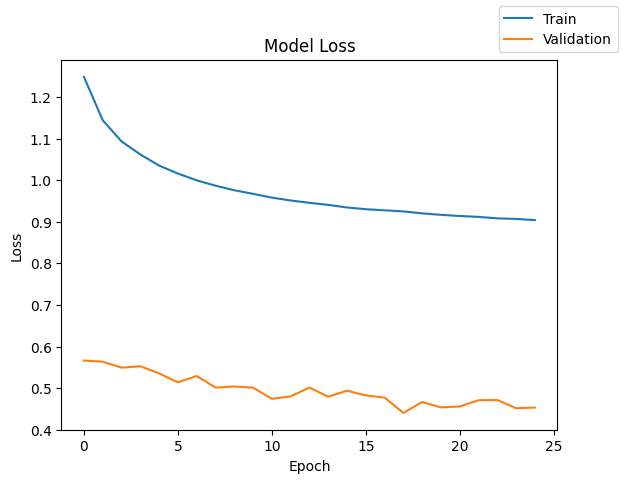

In [133]:
plot(history,'loss')


In [134]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [135]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5096
           1       0.51      0.76      0.61      1304

    accuracy                           0.80      6400
   macro avg       0.72      0.79      0.74      6400
weighted avg       0.84      0.80      0.82      6400



In [136]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1274
           1       0.48      0.73      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.83      0.79      0.80      1600



In [137]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.49      0.75      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



## Actionable Insights and Business Recommendations

* The bank can deploy the final model to identify with a reasonable degree of accuracy whether a customer is likely to churn or not, and this process seems to be easier and more time-efficient than other methods.

- The bank should include number of families and education in its handling strategies to bring and retain more customers. Diverse features are known to foster innovation and bring varied perspectives, which can ultimately benefit the bank's performance.

- Thereby improving customer satisfaction and reducing the likelihood of churn.

- Consider offering incentives or new opportunities for number of products to a customer in highly churn geography's to improve retention rates.



<font size=6 color='blue'>Power Ahead</font>
___

In [142]:
!jupyter nbconvert --to html Hana_Mekonnen_INN_Bank_Churn_Proj.ipynb


[NbConvertApp] Converting notebook Hana_Mekonnen_INN_Bank_Churn_Proj.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1372456 bytes to Hana_Mekonnen_INN_Bank_Churn_Proj.html
